### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [28]:
data = pd.read_csv('data/coupons.csv')

In [29]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [30]:
# Study which columns have missing values
print(data.isna().sum())

#Compare the misssing count with the total number of rows
print(data.shape)

# find the unique values of the car column
print(data[data['car'].notnull()]['car'].unique())

# find the counts of the unique values of the car column
print(data[data['car'].notnull()]['car'].value_counts())

print(data['CoffeeHouse'].value_counts(dropna=False))

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
(12684, 26)
['Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
car
Scooter and motorcycle                      22
Mazda5                               

3. Decide what to do about your missing data -- drop, replace, other...

In [31]:
#drop the car column because it has too many missing values and it is not very useful
data = data.drop(columns=['car'])


4. What proportion of the total observations chose to accept the coupon?



Percentage of coupons accepted: 56.84%


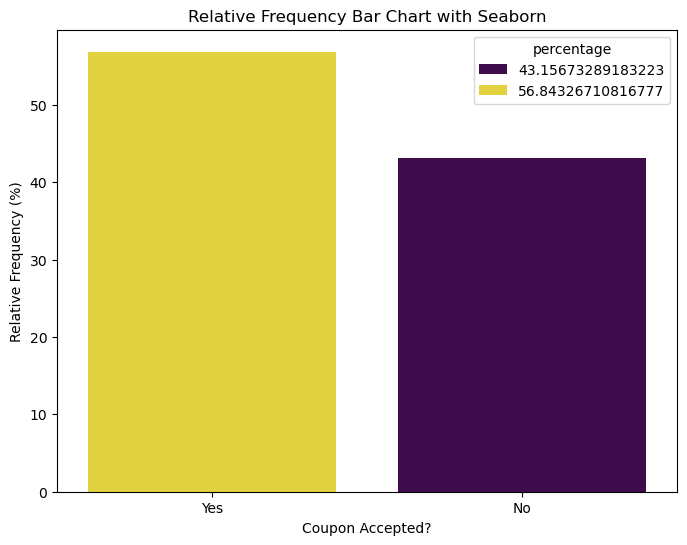

In [32]:
percent_cupon_accepted = data['Y'].value_counts(normalize=True)[1] * 100

print(f'Percentage of coupons accepted: {percent_cupon_accepted:.2f}%')


# data['Y'].value_counts().plot(kind='bar')
percentages_df = data['Y'].value_counts(normalize=True).rename('percentage').reset_index()
percentages_df['percentage'] = percentages_df['percentage'] * 100


# Map 0/1 -> "No"/"Yes"
label_map = {0: 'No', 1: 'Yes'}
percentages_df['Y_label'] = percentages_df['Y'].map(label_map)


plt.figure(figsize=(8, 6))
sns.barplot(x= 'Y_label', y='percentage', data=percentages_df, palette='viridis', hue='percentage', dodge=False)
plt.xlabel('Coupon Accepted?')
plt.ylabel('Relative Frequency (%)')
plt.title('Relative Frequency Bar Chart with Seaborn')

plt.show()

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupon Types')

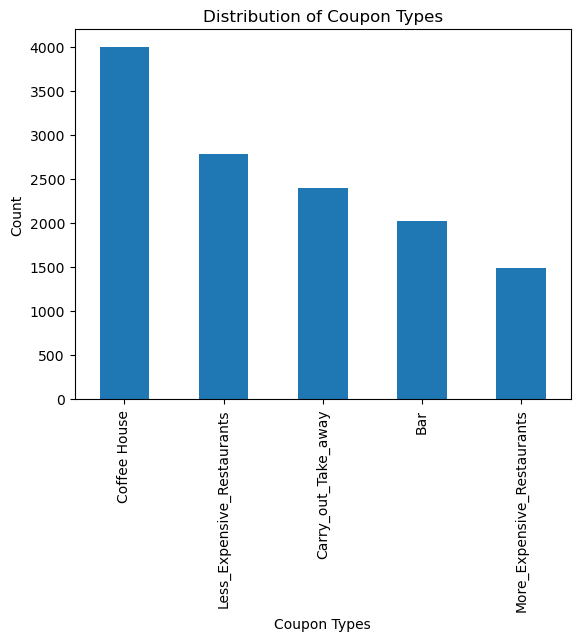

In [38]:
# replace 'Restaurant(<20)' with 'Restaurant_less_20' in the 'coupon' column
data['coupon'] = data['coupon'].replace('Restaurant(<20)', 'Less_Expensive_Restaurants')
# replace 'Restaurant(20-50)' with 'Restaurant_20_50' in the 'coupon' column
data['coupon'] = data['coupon'].replace('Restaurant(20-50)', 'More_Expensive_Restaurants')

#replace 'Carry out & Take away' with 'Carry_out_Take_away' in the 'coupon' column
data['coupon'] = data['coupon'].replace('Carry out & Take away', 'Carry_out_Take_away')

#plot bar plot to visualize the coupon column
data['coupon'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Coupon Types')
plt.ylabel('Count')
plt.title('Distribution of Coupon Types')



6. Use a histogram to visualize the temperature column.

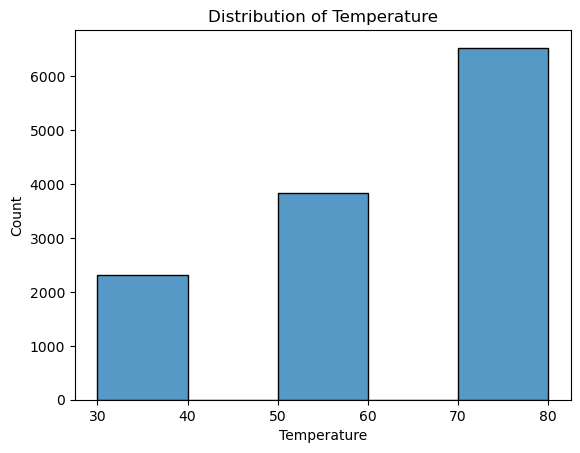

In [8]:

#draw a histogram of the temperature column using seaborn
sns.histplot(data['temperature'], bins=5)    
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
df_bar_coupon = data[data['coupon'] == 'Bar']
df_bar_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [24]:
print(df_bar_coupon['Y'].value_counts(normalize=True).rename('percentage').reset_index())

percent_bar_coupon_accepted = df_bar_coupon['Y'].value_counts(normalize=True)[1] * 100
print(f'Percentage of Bar coupons accepted: {percent_bar_coupon_accepted:.2f}%')

   Y  percentage
0  0    0.589985
1  1    0.410015
Percentage of Bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:



#dropping the unknown values in the 'Bar' column, as they do not provide any information about the frequency of bar visits
df_bar_coupon_without_Nan = df_bar_coupon.dropna(subset=['Bar']).copy()

# print(data['Bar'].unique()) #to make sure the categories are correct
map_bar = {
    'never' : -1, #this could've been mapped to 0, but to distinguish between people who never go to bar and those who go less than once a month, therefore mapped it to -1
    'less1': 0,
    '1~3':  3,
    'gt8': 8,
    '4~8': 4
}

#mapping the 'Bar' column to numeric values for easier analysis
df_bar_coupon_without_Nan['bar_num'] = df_bar_coupon_without_Nan['Bar'].map(map_bar)

#prepare a dataframe containing only data where coupons were accepted
df_bar_coupon_without_Nan = df_bar_coupon_without_Nan[df_bar_coupon_without_Nan['Y'] == 1]

proportions = df_bar_coupon_without_Nan['bar_num'].value_counts(normalize=True)

percent_people_visited_bar_fewer_than_three_times_a_month = (proportions[-1] + proportions[0] + proportions[3]) * 100

percent_people_visited_bar_more_than_three_times_a_month = (proportions[4] +  proportions[8]) * 100

print(f'Percentage People Visited Bar Fewer Than Three Times A Month: {percent_people_visited_bar_fewer_than_three_times_a_month:.2f}%')

print(f'Percentage People Visited Bar More Than Three Times A Month: {percent_people_visited_bar_more_than_three_times_a_month:.2f}%')

print(proportions)


Percentage People Visited Bar Fewer Than Three Times A Month: 81.32%
Percentage People Visited Bar More Than Three Times A Month: 18.68%
bar_num
 3    0.313797
 0    0.308913
-1    0.190476
 4    0.142857
 8    0.043956
Name: proportion, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:

#find the unique values of the age column
# print(data['age'].unique()) #to make sure the categories are correct for mapping and ensure there is no null values

map_age = {
	'21': 21,
	'46': 46,
	'26': 26,
	'31': 31,
	'50plus': 51,
	'41': 41,
	'36': 36,
	'below21': 20
}


#create a new numerical column for the age column
data['age_num'] = data["age"].map(map_age)

map_bar = {
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 4,
    'gt8': 8
}

data['bar_num'] = data['Bar'].map(map_bar)


bar_visitors_age_gt_25 = data[(data['age_num'] > 25) & (data['bar_num'] > 1)]['Y'].mean()
bar_visitors_age_lt_25 = data[(data['age_num'] <= 25) & (data['bar_num'] < 1)]['Y'].mean()

print(f"{bar_visitors_age_gt_25 * 100:.2f}%")
print(f"{bar_visitors_age_lt_25 * 100:.2f}%")

if bar_visitors_age_gt_25 > bar_visitors_age_lt_25:
    print("Drivers who go to a bar more than once a month and are over 25 accept coupons at a higher rate.")
else:
    print("All others accept coupons at a higher or similar rate.")




62.15%
59.38%
Drivers who go to a bar more than once a month and are over 25 accept coupons at a higher rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:

# Map bar frequency for numeric comparison
map_bar = {
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 4,
    'gt8': 8
}
data['bar_num'] = data['Bar'].map(map_bar)

filtered_data = data[
    (data['passanger'] != 'Kid(s)') &
    (data['occupation'] != 'Farming Fishing & Forestry')
]

# Group A: bar visits > 1/month
bar_visited_gt_1 = filtered_data[filtered_data['bar_num'] > 1]
bar_visited_lt_1 = filtered_data[filtered_data['bar_num'] <= 1]

# Acceptance rates
rate_bar_visited_gt_1 = bar_visited_gt_1['Y'].mean() * 100
rate_bar_visited_lt_1 = bar_visited_lt_1['Y'].mean() * 100

print(f"Acceptance Rate of people visiting bar more than once a month : {rate_bar_visited_gt_1:.2f}%")
print(f"Acceptance Rate of people visiting bar once or less times a month : {rate_bar_visited_lt_1:.2f}%")

if rate_bar_visited_gt_1 > rate_bar_visited_lt_1:
    print("Drivers who go to bars more than once a month accept coupons at a higher rate.")
else:
    print("Drivers who go to bars once or less a month do not have a higher acceptance rate.")


Acceptance Rate of people visiting bar more than once a month : 62.31%
Acceptance Rate of people visiting bar once or less times a month : 55.20%
Drivers who go to bars more than once a month accept coupons at a higher rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
map_bar = {
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 4,
    'gt8': 8
}
data['bar_num'] = data['Bar'].map(map_bar)

#passangers Alone could have been added here but avoiding here strictly to stick with problem statement
filtered_data = data[(data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed') & (data['bar_num'] > 1)]

acceptance_rate = filtered_data['Y'].mean() * 100

print(f"Acceptance rate of drivers with passangers other than kids, marital status other than Widowed and visited bar gt once per month is: {acceptance_rate :.2f}%")


filtered_data = data[(data['age_num'] < 30 ) & (data['bar_num'] > 1)]

acceptance_rate = filtered_data['Y'].mean() * 100

print(f"Acceptance rate of drivers below age 30 and visited by once per month is: {acceptance_rate:.2f}%" )

  
map_restaurant_LeassThan20 = {
	'never': 0,
	'less1': 0, # treat less than 1 as zero visits
	'1~3': 3,
	'4~8': 4,
	'gt8': 9
}

#create a new numerical column for the age column
data['RestaurantLessThan20_num'] = data["RestaurantLessThan20"].map(map_restaurant_LeassThan20)

                     
map_income = {
	'Less than $12500': 12499,
	'$12500 - $24999': 25000,
	'$25000 - $37499': 25001,
	'$37500 - $49999': 50000,
	'$50000 - $62499': 62500,
	'$62500 - $74999': 75000,
    '$75000 - $87499': 87500,
	'$87500 - $99999': 100000,
	'$100000 or More': 100001
}

#create a new numerical column for the age column
data['income_num'] = data["income"].map(map_income)

filtered_data = data[(data['income_num'] < 50000) & (data['RestaurantLessThan20_num'] >= 4 )]

acceptance_rate = filtered_data['Y'].mean() * 100
print(f"Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate :.2f}%")


Acceptance rate of drivers with passangers other than kids, marital status other than Widowed and visited bar gt once per month is: 62.31%
Acceptance rate of drivers below age 30 and visited by once per month is: 62.81%
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 58.91%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
print("This analsis shows that marketing strategy to focus on certain drivers demographics and behavior such as age, bar visit frequency, and dining preferences can significantly enhance coupon acceptance rates.")


This analsis shows that marketing strategy to focus on certain drivers demographics and behavior such as age, bar visit frequency, and dining preferences can significantly enhance coupon acceptance rates.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:

#  Discover if the acceptance rate is higher or lower based on time of the day by Male drivers
print(data['time'].unique())

map_time = {
	'2PM': 14,
	'10AM': 10, # treat less than 1 as zero visits
	'6PM': 18,
	'7AM': 7,
	'10PM': 22	
}

data['time_num'] = data["time"].map(map_time)

filtered_data = data[(data['gender'] == 'Male') & (data['time_num'] > 12)]

acceptance_rate = filtered_data['Y'].mean() * 100

print(acceptance_rate)

filtered_data = data[(data['gender'] == 'Male') & (data['time_num'] < 12)]

acceptance_rate = filtered_data['Y'].mean() * 100

print(acceptance_rate)

print("The analysis indicates time of the day does not significantly impact coupon acceptance rates among the Male drivers.")



['2PM' '10AM' '6PM' '7AM' '10PM']
60.52481460353679
57.18035245594301
The analysis indicates time of the day does not significantly impact coupon acceptance rates among the Male drivers.


In [17]:
#Find if the coupon acceptance rate per category is significantly different b/w Male and Female drivers

print(data['coupon'].unique())

filtered_data_male = data[(data['gender'] == 'Male') & (data['Y'] == 1)]['coupon'].value_counts()

print(filtered_data_male)

filtered_data_female = data[(data['gender'] == 'Female') & (data['Y'] == 1)]['coupon'].value_counts()

print(filtered_data_female)
   

percent_coffe_house_coupon_accepted_by_male = (filtered_data_male['Coffee House'] / (filtered_data_male['Coffee House'] + filtered_data_female['Coffee House'])) * 100
print(percent_coffe_house_coupon_accepted_by_male)
percent_coffe_house_coupon_accepted_by_female = (filtered_data_female['Coffee House'] / (filtered_data_male['Coffee House'] + filtered_data_female['Coffee House'])) * 100
print(percent_coffe_house_coupon_accepted_by_female)
 
print("The analysis suggests that the types of cupons accepted by male or female drivers do not significantly differ.")


['Less_Expensive_Restaurants' 'Coffee House' 'Carry_out_Take_away' 'Bar'
 'More_Expensive_Restaurants']
coupon
Coffee House                  985
Less_Expensive_Restaurants    980
Carry_out_Take_away           875
Bar                           471
More_Expensive_Restaurants    336
Name: count, dtype: int64
coupon
Coffee House                  1010
Less_Expensive_Restaurants     990
Carry_out_Take_away            885
Bar                            356
More_Expensive_Restaurants     322
Name: count, dtype: int64
49.373433583959894
50.6265664160401
The analysis suggests that the types of cupons accepted by male or female drivers do not significantly differ.
